In [9]:
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as mp

In [3]:
import pandas as pd
data=pd.read_csv("data7.tsv",sep="\t")
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [4]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
data.value_counts()

PhraseId  SentenceId  Phrase                                                                                                                                                                                        Sentiment
1         1           A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  1            1
104044    5487        exist without the precedent of Yiddish theater , whose jolly , fun-for-fun 's - sake communal spirit goes to the essence of Broadway                                                          2            1
104037    5487        American musical comedy as we                                                                                                                                                                 2            1
104038    5487        American musical comedy                                                    

In [7]:
data.Sentiment.value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

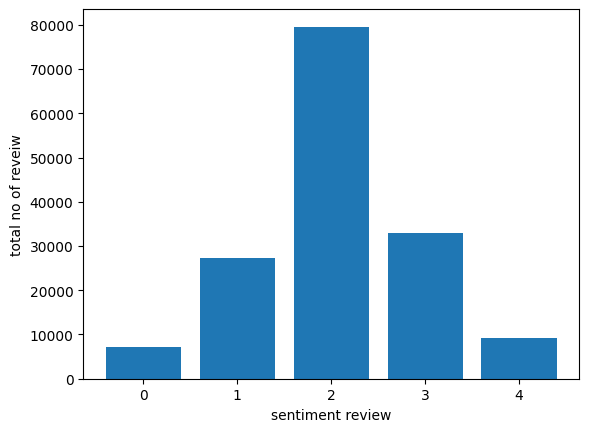

In [11]:
sentiment_count=data.groupby("Sentiment").count()
mp.bar(sentiment_count.index.values,sentiment_count["Phrase"])
mp.xlabel("sentiment review")
mp.ylabel("total no of reveiw")
mp.show()


In [14]:
sentiment_count.index.values

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
sentiment_count["Phrase"]

Sentiment
0     7072
1    27272
2    79581
3    32927
4     9206
Name: Phrase, dtype: int64

In [16]:
sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27272
2,79582,79582,79581
3,32927,32927,32927
4,9206,9206,9206


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit(data['Phrase'])

ValueError: np.nan is an invalid document, expected byte or unicode string.